In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'results.csv'  # Replace with your file path
data = pd.read_csv(file_path)
print(data)


                                    model_id     dtype  compile device  \
0                       google/gemma-2-2b-it  bfloat16    False   auto   
1                       google/gemma-2-2b-it  bfloat16    False   auto   
2                       google/gemma-2-2b-it  bfloat16    False   auto   
3                       google/gemma-2-2b-it  bfloat16    False   auto   
4                       google/gemma-2-2b-it  bfloat16    False   auto   
...                                      ...       ...      ...    ...   
18701  meta-llama/Meta-Llama-3.1-8B-Instruct  bfloat16     True   auto   
18702  meta-llama/Meta-Llama-3.1-8B-Instruct  bfloat16     True   auto   
18703  meta-llama/Meta-Llama-3.1-8B-Instruct  bfloat16     True   auto   
18704  meta-llama/Meta-Llama-3.1-8B-Instruct  bfloat16     True   auto   
18705  meta-llama/Meta-Llama-3.1-8B-Instruct  bfloat16     True   auto   

      precision  length   time_cold   time_warm  
0       highest     100  696.008728   40.894463  
1       hig

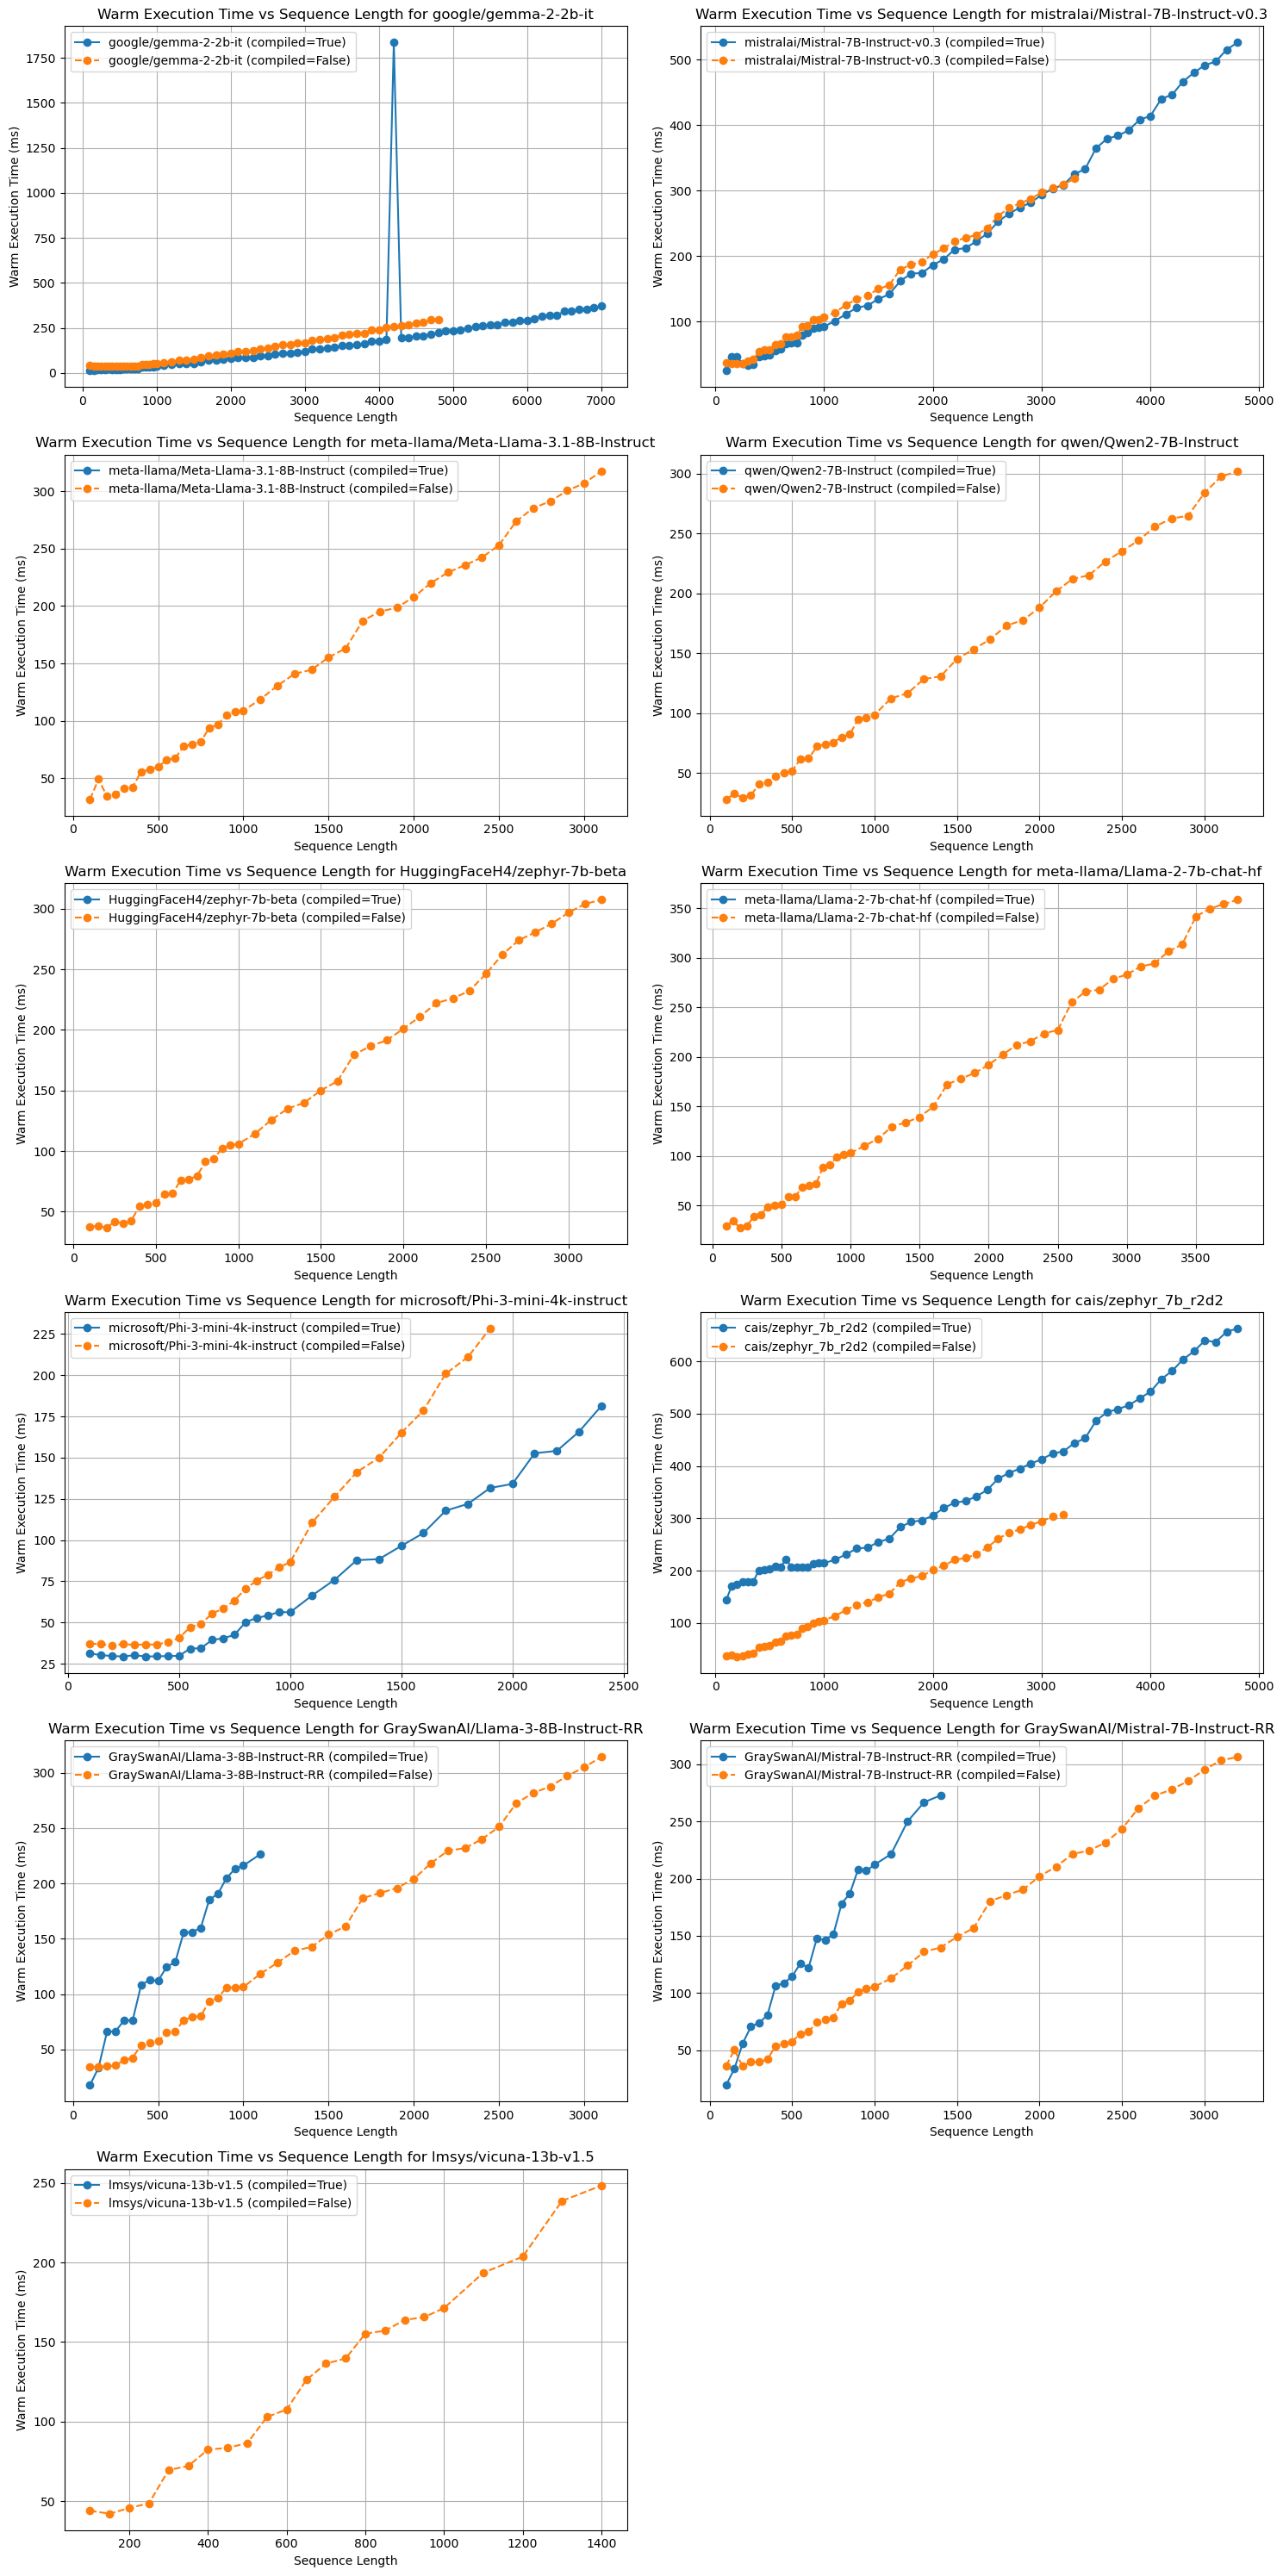

In [20]:
from matplotlib import ticker

bfloat16_data = data[data['dtype'] == 'bfloat16']

# Get unique models for bfloat16 data
unique_bfloat16_models = bfloat16_data['model_id'].unique()
num_bfloat16_models = len(unique_bfloat16_models)

# Calculate number of rows and columns for a grid layout
num_columns = 2  # Adjust the number of columns as desired
num_rows = (num_bfloat16_models + num_columns - 1) // num_columns  # Ceiling division for rows

# Set up the grid subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each model and create a subplot in the grid with two lines for compile = True/False
for i, model in enumerate(unique_bfloat16_models):
    model_data = bfloat16_data[bfloat16_data['model_id'] == model]
    model_data = model_data[model_data['precision'] == 'high']
    model_data = model_data[model_data['device'] == 'cuda']
    # Group the data by compile and sequence length, then average the numeric time_warm for each
    compiled_data = model_data[model_data['compile'] == True].groupby('length').mean(numeric_only=True).reset_index()
    uncompiled_data = model_data[model_data['compile'] == False].groupby('length').mean(numeric_only=True).reset_index()

    # Plot for compile = True
    axes[i].plot(compiled_data['length'], compiled_data['time_warm'], marker='o', label=f'{model} (compiled=True)', linestyle='-')

    # Plot for compile = False
    axes[i].plot(uncompiled_data['length'], uncompiled_data['time_warm'], marker='o', label=f'{model} (compiled=False)', linestyle='--')

    # Set titles and labels
    axes[i].set_title(f'Warm Execution Time vs Sequence Length for {model}')
    axes[i].set_ylabel('Warm Execution Time (ms)')
    axes[i].set_xlabel('Sequence Length')
    axes[i].grid(True)
    axes[i].legend()

    # # Add a y-axis break between 1500 and 100000

    # def break_yaxis(ax, break_start, break_end):
    #     ax.set_ylim(bottom=0, top=break_start)
    #     ax2 = ax.twinx()
    #     ax2.set_ylim(bottom=break_end, top=ax.get_ylim()[1])
    #     ax2.spines['top'].set_visible(False)
    #     ax2.spines['bottom'].set_visible(False)
    #     ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    #     ax2.yaxis.set_minor_locator(ticker.NullLocator())
    #     ax2.tick_params(axis='y', which='both', length=0)
    #     ax2.yaxis.set_ticks_position('right')
    #     ax2.yaxis.set_label_position('right')
    #     return ax2

    # for ax in axes:
    #     break_yaxis(ax, 1500, 100000)
# Remove unused subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

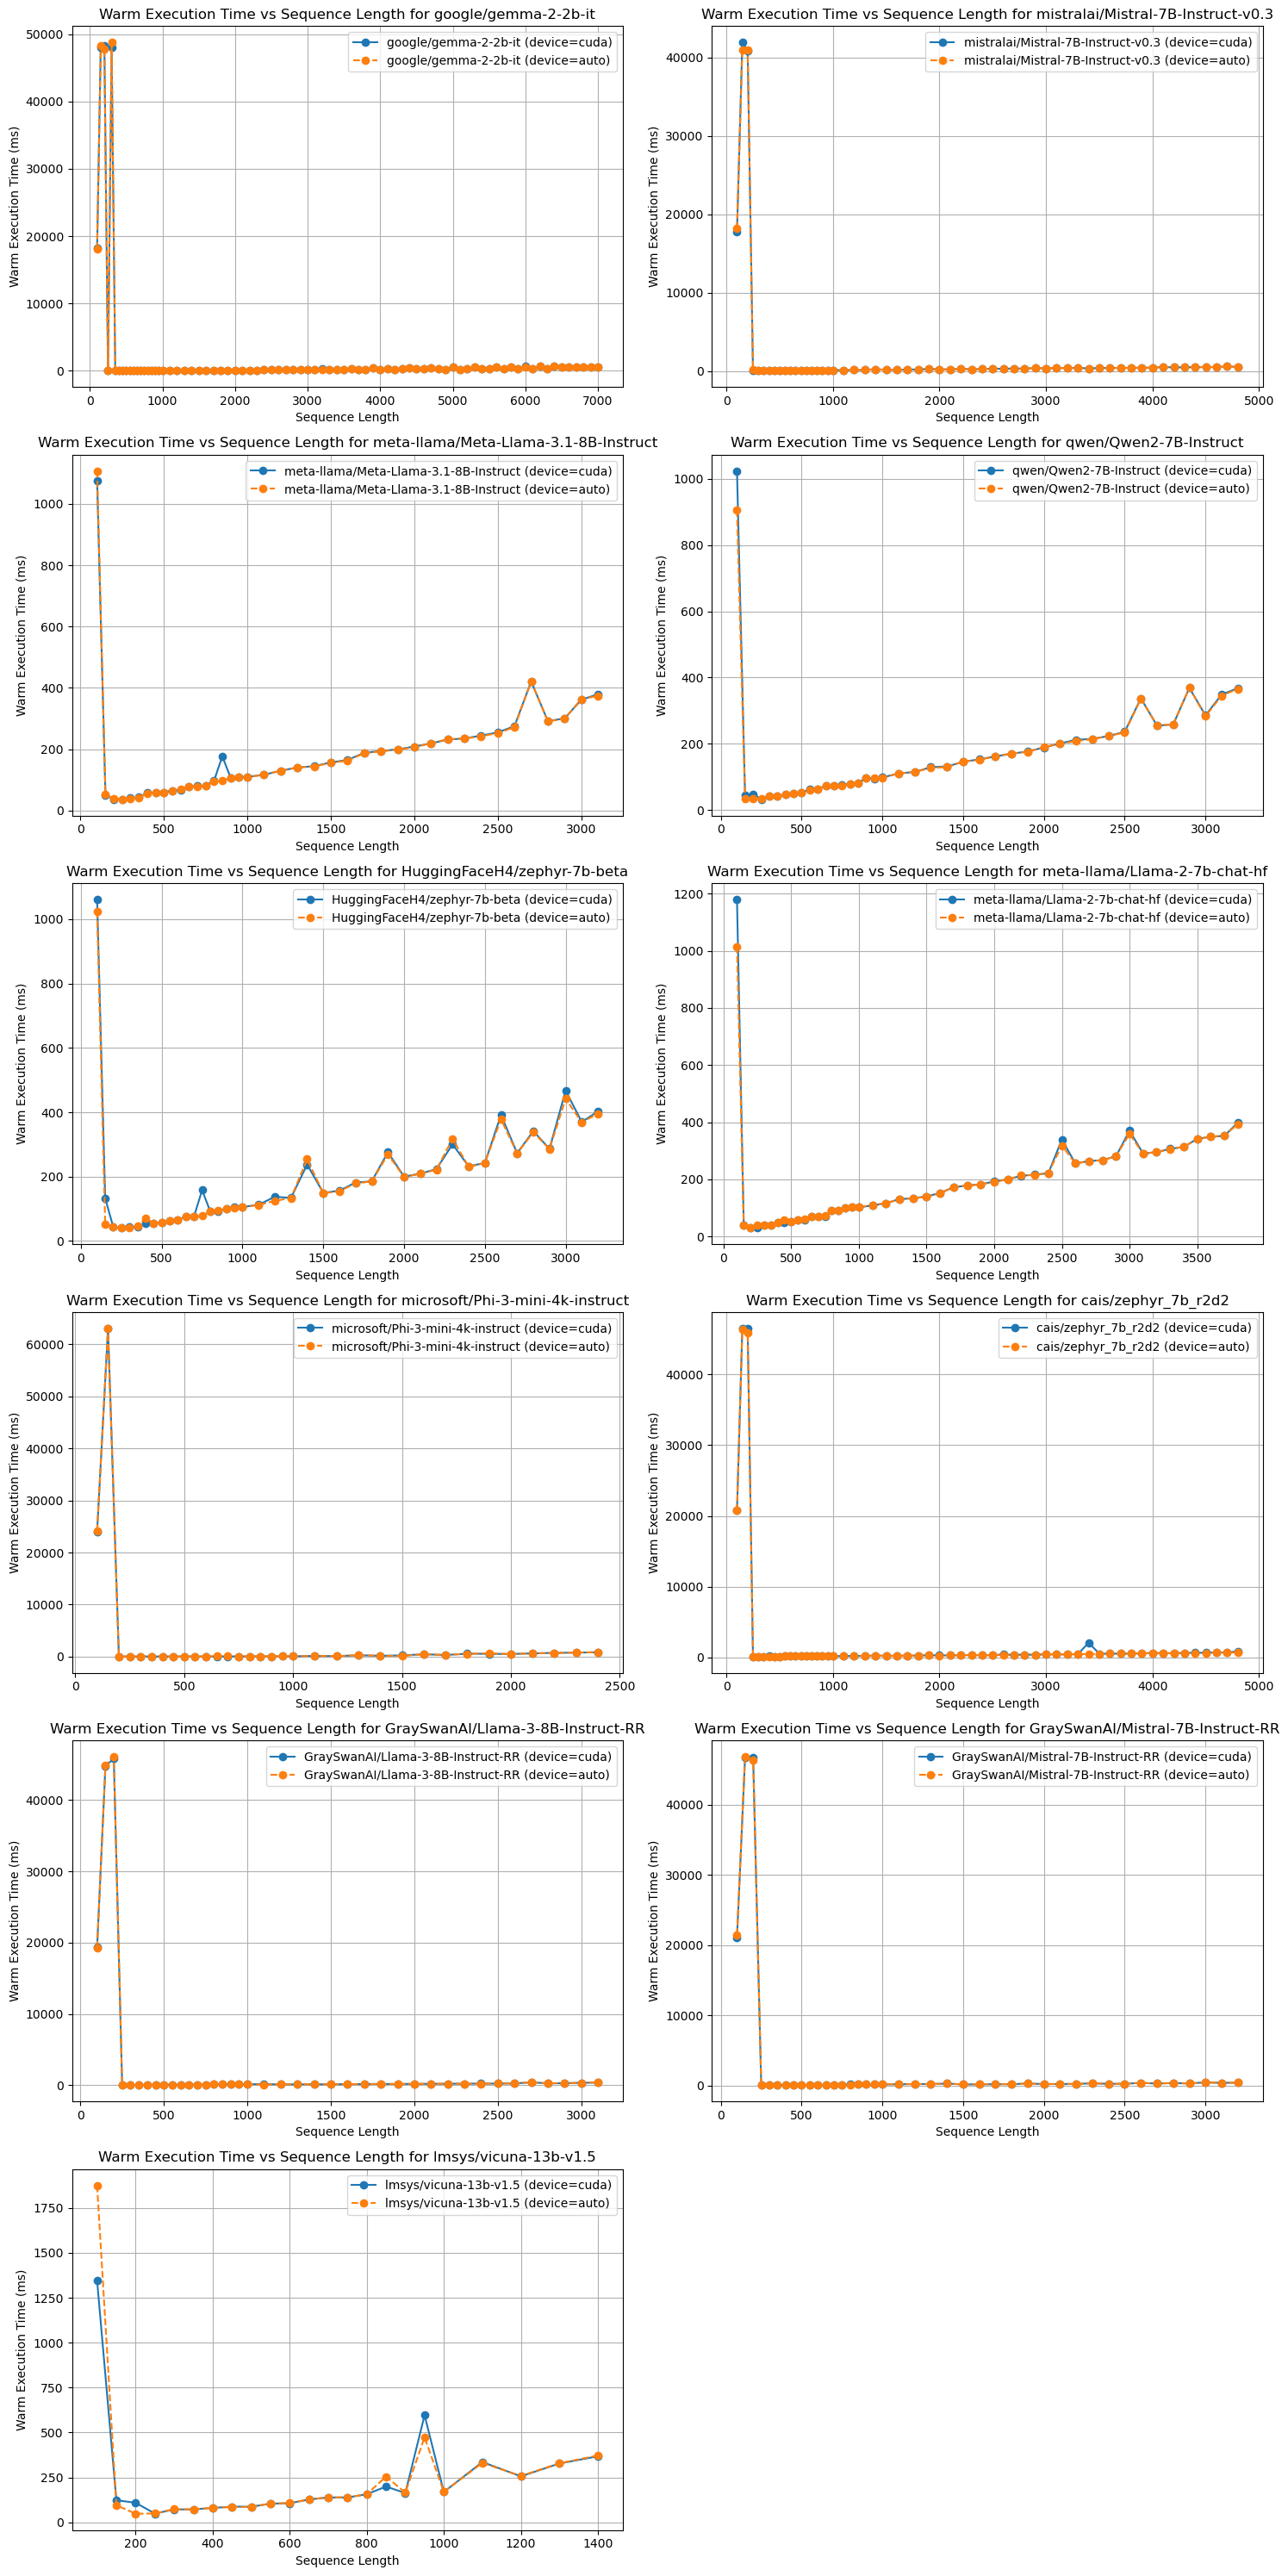

In [12]:
bfloat16_data = data[data['dtype'] == 'bfloat16']

# Get unique models for bfloat16 data
unique_bfloat16_models = bfloat16_data['model_id'].unique()
num_bfloat16_models = len(unique_bfloat16_models)

# Calculate number of rows and columns for a grid layout
num_columns = 2  # Adjust the number of columns as desired
num_rows = (num_bfloat16_models + num_columns - 1) // num_columns  # Ceiling division for rows

# Set up the grid subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each model and create a subplot in the grid with two lines for device = 'cuda'/'auto'
for i, model in enumerate(unique_bfloat16_models):
    model_data = bfloat16_data[bfloat16_data['model_id'] == model]
    model_data = model_data[model_data['precision'] == 'high']

    # Group the data by device and sequence length, then average the numeric time_warm for each
    cuda_data = model_data[model_data['device'] == 'cuda'].groupby('length').mean(numeric_only=True).reset_index()
    auto_data = model_data[model_data['device'] == 'auto'].groupby('length').mean(numeric_only=True).reset_index()

    # Plot for device = 'cuda'
    axes[i].plot(cuda_data['length'], cuda_data['time_cold'], marker='o', label=f'{model} (device=cuda)', linestyle='-')

    # Plot for device = 'auto'
    axes[i].plot(auto_data['length'], auto_data['time_cold'], marker='o', label=f'{model} (device=auto)', linestyle='--')

    # Set titles and labels
    axes[i].set_title(f'Warm Execution Time vs Sequence Length for {model}')
    axes[i].set_ylabel('Warm Execution Time (ms)')
    axes[i].set_xlabel('Sequence Length')
    axes[i].grid(True)
    axes[i].legend()

# Remove unused subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()